In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import chi2, norm, cauchy
from iminuit import Minuit
from iminuit.cost import LeastSquares
# Cambiare directory per spostarsi nella cartella principale
import os
while not os.getcwd().endswith('Laboratorio_SiPM'):
    os.chdir('..')

#importo libreria
import sys
sys.path.append('Config')
from lablib import *


In [69]:
#definisco le varie funzioni
def gauss(x, mu, sigma, a):
    return a * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

def gauss_pol2(x, mu, sigma, a, b, c, cost):
    return gauss(x, mu, sigma, a) + b*x + c * x**2 + cost

def gauss_exp(x, mu, sigma, a, b):
    return gauss(x, mu, sigma, a) + b * np.exp(-x) 

def gauss_pol3 (x, mu, sigma, a, b, c, cost, d):
    return gauss_pol2(x, mu, sigma, a, b, c, cost) + d* x**3

# 55.5

Text(0.5, 1.0, 'Cristallo BGO')

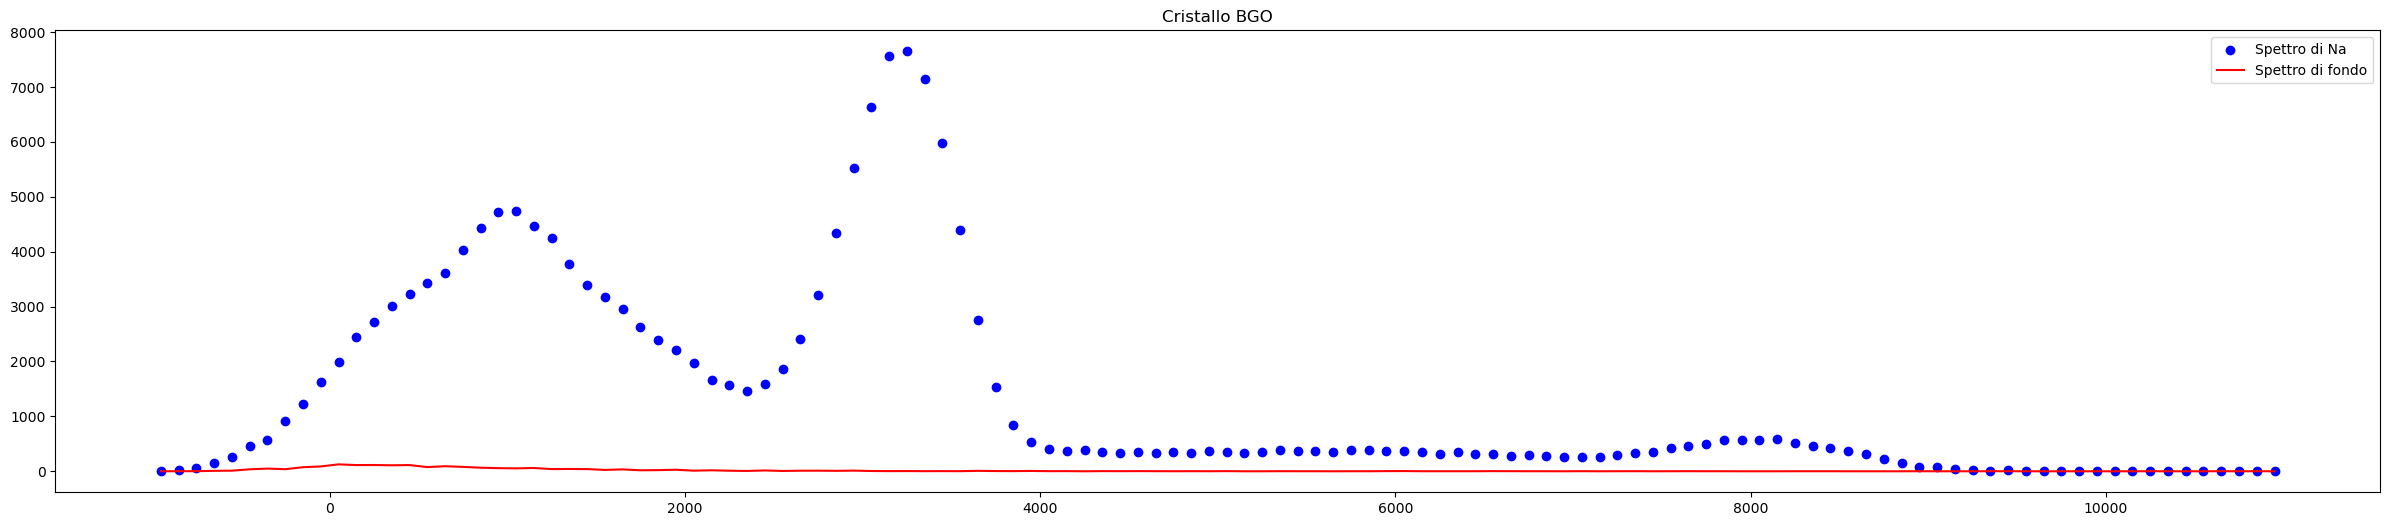

In [70]:
#prendo i dati
df = pd.read_csv('Dati/Parte 2/BGO/Sodio_55.5V.txt', delim_whitespace= 'True', skiprows = 65, header=None, encoding= 'ISO-8859-1', names= ['ADC', 'Counts'])
df_bkg = pd.read_csv ('Dati/Parte 2/BGO/Bkg_55.5V.txt', delim_whitespace = 'True', header = None, skiprows = 65, encoding = 'ISO-8859-1', names = ['ADC', 'Counts'])
fig, ax = plt.subplots(figsize = (30,6))
plt.scatter(df['ADC'][:120], df['Counts'][:120], label = 'Spettro di Na', color = 'blue')
plt.plot(df_bkg['ADC'][:120], df_bkg['Counts'][:120], label = 'Spettro di fondo', color = 'red')
plt.legend()
plt.title('Cristallo BGO')

## Primo picco

In [92]:
start_index = 35
end_index = 51
df_primo_picco_sodio = df.iloc[start_index:end_index]
err_primo_picco_sodio = np.array(np.sqrt(df_primo_picco_sodio['Counts']))
#print(err_primo_picco_sodio)


In [93]:
LS_fit(df_primo_picco_sodio['ADC'], df_primo_picco_sodio['Counts'], err_primo_picco_sodio, gauss, mu = 3170, sigma = 350, a = 7400 )
# mu = 3212.3180344 +/- 1.6447200
# sigma = 301.6434072 +/- 0.7273093
# a = 7449.1536436 +/- 349.4674330

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 523 (χ²/ndof = 40.2)       │              Nfcn = 76               │
│ EDM = 2.44e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │ 3.1793e3  │ 0.0015e3  │            │            │         │         │       │
│ 1 │ sigma │   337.2   │    1.3    │            │            │         │         │       │
│ 2 │ a     │  7.55e3   │  0.04e3   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬────────────────────────────┐
│       │       mu    sigma        a │
├───────┼────────────────────────────┤
│    mu │     2.38     -0.7     11.1 │
│ sigma │     -0.7      1.8    -34.1 │
│     a │     11.1    -34.1 1.57e+03 │
└───────┴────────────────────────────┘

(('mu', 'sigma', 'a'),
 <ValueView mu=3179.306893746671 sigma=337.2397754390937 a=7551.432081851714>,
 <ErrorView mu=1.5431672400803904 sigma=1.3401664976636143 a=39.58330315029844>,
 0.0,
 13.0,
 522.988471237888,
 ┌───────┬────────────────────────────┐
│       │       mu    sigma        a │
├───────┼────────────────────────────┤
│    mu │     2.38     -0.7     11.1 │
│ sigma │     -0.7      1.8    -34.1 │
│     a │     11.1    -34.1 1.57e+03 │
└───────┴────────────────────────────┘)

## secondo picco

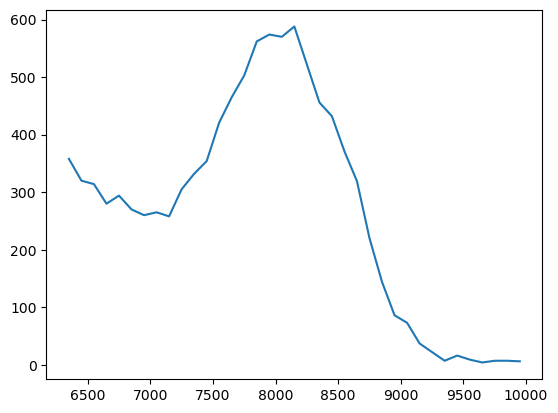

In [114]:
start_index = 73
end_index = 110
df_secondo_picco_sodio = df.iloc[start_index : end_index]
err_secondo_picco_sodio = np.array(np.sqrt(df_secondo_picco_sodio['Counts']))
plt.plot(df_secondo_picco_sodio['ADC'], df_secondo_picco_sodio['Counts'])
#print(df_secondo_picco_sodio)

In [117]:
LS_fit(df_secondo_picco_sodio['ADC'], df_secondo_picco_sodio['Counts'], err_secondo_picco_sodio, gauss_pol2, mu = 8000, sigma = 350, a = 500, b = -5, c = 0, cost = 0)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1673 (χ²/ndof = 54.0)      │             Nfcn = 1025              │
│ EDM = 2.53 (Goal: 0.0002)        │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  6.170e3  │  0.004e3  │            │            │         │         │       │
│ 1 │ sigma │  4.518e3  │  0.005e3  │            │            │         │         │       │
│ 2 │ a     │ 17.925e3  │  0.011e3  │            │            │         │         │       │
│ 3 │ b     │  -2.9363  │  0.0011   │            │            │         │         │       │
│ 4 │ c     │ 265.65e-6 │  0.12e-6  │            │            │         │         │       │
│ 5 │ cost  │  -9.72e3  │  0.01e3   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────────────────┐
│       │             mu          sigma              a              b              c           cost │
├───────┼───────────────────────────────────────────────────────────────────────────────────────────┤
│    mu │           17.9             -9             -1      -916.7e-6 -119.676999e-9             -4 │
│ sigma │             -9           22.8             21     -1.2102e-3 -238.020156e-9             -0 │
│     a │             -1             21            112     -3.9250e-3 -158.401277e-9        -0.07e3 │
│     b │      -916.7e-6     -1.2102e-3     -3.9250e-3       1.28e-06    -26.718e-12     -2.7912e-3 │
│     c │ -119.676999e-9 -238.020156e-9 -158.401277e-9    -26.718e-12       1.36e-14 -201.207284e-9 │
│  cost │             -4             -0        -0.07e3     -2.7912e-3 -201.207284e-9            103 │
└───────┴───────────────────────────────────────────────────────────────────────────────────────────┘

(('mu', 'sigma', 'a', 'b', 'c', 'cost'),
 <ValueView mu=6169.9175573186785 sigma=4517.537209030435 a=17924.531220624765 b=-2.936330374878057 c=0.0002656463910706142 cost=-9720.415355152665>,
 <ErrorView mu=4.231572720860375 sigma=4.775127666229659 a=10.571637267631386 b=0.0011335439612963883 c=1.1658372803888457e-07 cost=10.138443241352766>,
 0.0,
 31.0,
 1672.8542462301364,
 ┌───────┬───────────────────────────────────────────────────────────────────────────────────────────┐
│       │             mu          sigma              a              b              c           cost │
├───────┼───────────────────────────────────────────────────────────────────────────────────────────┤
│    mu │           17.9             -9             -1      -916.7e-6 -119.676999e-9             -4 │
│ sigma │             -9           22.8             21     -1.2102e-3 -238.020156e-9             -0 │
│     a │             -1             21            112     -3.9250e-3 -158.401277e-9        -0.07e3 │
│     b │